In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.shape

(2200, 8)

In [6]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [8]:
df['label'] = label_encoder.fit_transform(df['label'])

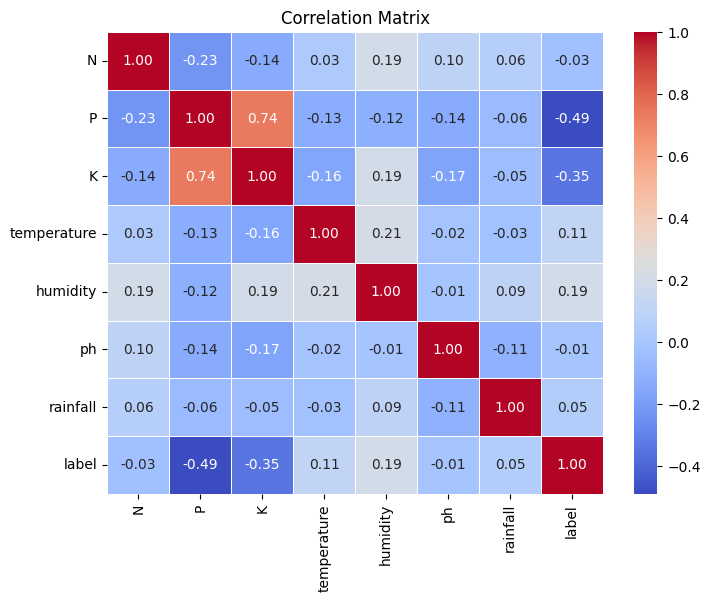

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
df.corr()['label']

N             -0.031130
P             -0.491006
K             -0.346417
temperature    0.113606
humidity       0.193911
ph            -0.012253
rainfall       0.045611
label          1.000000
Name: label, dtype: float64

In [11]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [12]:

df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
x = df.drop('label', axis = 1)
y = df['label']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


dt_predictions = dt_model.predict(X_test)
print("Decision Tree Metrics:")
print(classification_report(y_test, dt_predictions))
decision_accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy:", decision_accuracy)

Decision Tree Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      0.96      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      0.87      0.93        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.90      0.95      0.92        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
    

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
print("Random Forest Metrics:")
print(classification_report(y_test, rf_predictions))
random_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
    

In [17]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)


xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Metrics:")
print(classification_report(y_test, xgb_predictions))
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy:",xgb_accuracy )


XGBoost Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          

In [19]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


svm_predictions = svm_model.predict(X_test)
print("SVM Metrics:")
print(classification_report(y_test, svm_predictions))
svm_accuracy =  accuracy_score(y_test, svm_predictions)
print("Accuracy:",svm_accuracy)


SVM Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.86      0.86      0.86        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17  

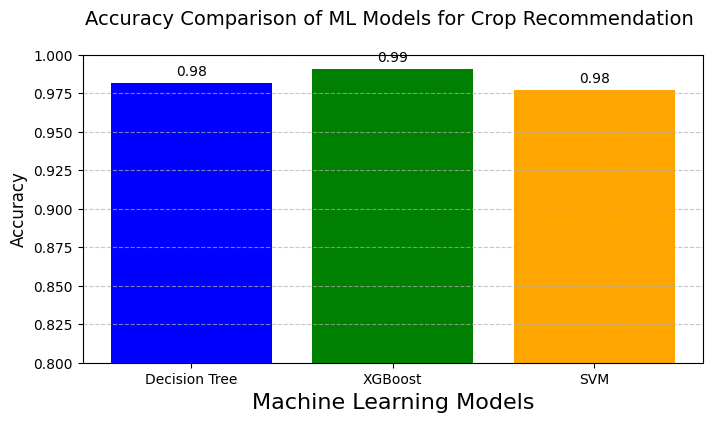

In [20]:
model_names = ['Decision Tree',  'XGBoost', 'SVM']
accuracies = [decision_accuracy, xgb_accuracy, svm_accuracy] 
plt.figure(figsize=(8, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'purple'])

plt.xlabel('Machine Learning Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of ML Models for Crop Recommendation \n', fontsize=14)
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.2f}', ha='center', fontsize=10)

plt.show()


In [21]:
 import joblib
joblib.dump(dt_model,'cropmodel.pkl')

['cropmodel.pkl']